# Explore observation data

* In-situ (buoy/station) data
    - Water level
    - Currents
* Satellite altimetry data (water level)

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

In [1]:
import glob
from pathlib import Path
import pandas as pd
import mikeio
import modelskill as ms

In [2]:
fldr = "../observations/" 

In [3]:
msh = mikeio.open("../input/mesh_EMOD.mesh")

## In-situ stations

In [4]:
df_stn = pd.read_csv(fldr + "stations.csv", index_col=0)
df_stn

,Longitude,Latitude
Station,,
Drogden,12.7117,55.5358
Klagshamn,12.8920,55.5260
Barseback,12.9033,55.7564
Dragor,12.6833,55.6000
Flinten7,12.8445,55.5894
Helsingborg,12.6845,56.0412
Hornbaek,12.4660,56.0970
Kobenhavn,12.6500,55.7000
Koege,12.2000,55.4500


## Water level stations

In [5]:
# loop over all stations and load data and create ms.PointObservation for each (use long, lat and name from df_stn)
wllist = []
for i, row in df_stn.iterrows():
    df = pd.read_csv(fldr + f"{i}_wl.csv", index_col=0, parse_dates=True)
    q = ms.Quantity(name="Surface Elevation", unit="meter")
    o = ms.PointObservation(df.SLEV, x=row['Longitude'], y=row['Latitude'], name=i, quantity=q)
    wllist.append(o)

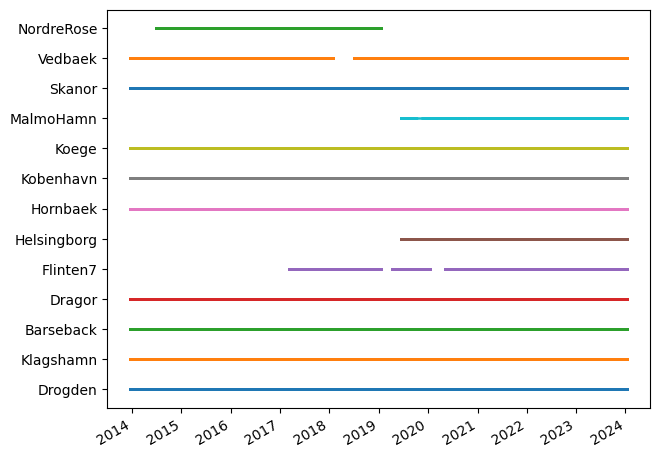

In [6]:
ms.plotting.temporal_coverage(wllist);

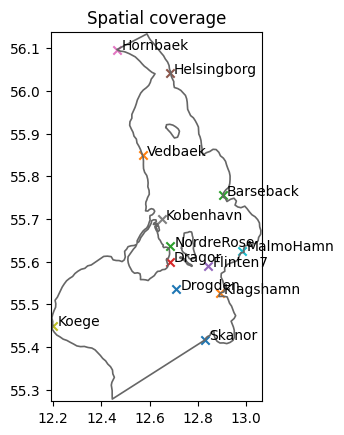

In [7]:
ms.plotting.spatial_overview(wllist, mod=msh.geometry);

## Current stations

In [8]:
qu = ms.Quantity(name="u-current", unit="m/s")
ulist = []
vlist = []
for i, row in df_stn.iterrows():
    if not Path(fldr + f"{i}_u_v.csv").exists():
        continue
    df = pd.read_csv(fldr + f"{i}_u_v.csv", index_col=0, parse_dates=True)    
    o = ms.PointObservation(df["current u"], x=row['Longitude'], y=row['Latitude'], name=i, quantity=qu)
    ulist.append(o)
    o = ms.PointObservation(df["current v"], x=row['Longitude'], y=row['Latitude'], name=i, quantity=qu)
    vlist.append(o)

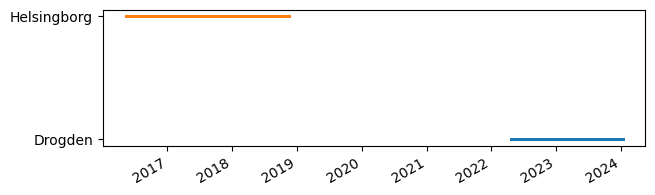

In [9]:
ms.plotting.temporal_coverage(ulist);

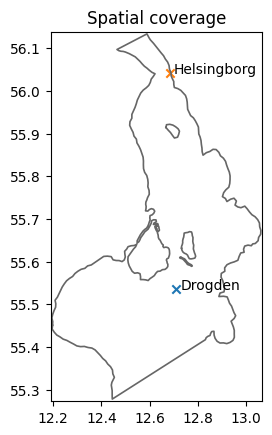

In [10]:
ms.plotting.spatial_overview(ulist, mod=msh.geometry);

## Altimetry 

In [11]:
sat_files = glob.glob(fldr + "Altimetry_wl_*.csv")
missions = [f.split("_")[2].split(".")[0] for f in sat_files]
missions

['3a', '3b', '6a', 'c2', 'j2', 'j3', 'sa']

In [12]:
q = ms.Quantity(name="Surface Elevation", unit="meter")
altlist = []
for m in missions:
    df = pd.read_csv(fldr + f"Altimetry_wl_{m}.csv", index_col=0, parse_dates=True)
    o = ms.TrackObservation(df, x_item="longitude", y_item="latitude", name=m, quantity=q)
    altlist.append(o)

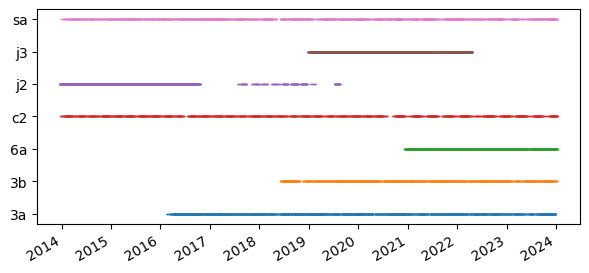

In [13]:
ms.plotting.temporal_coverage(altlist);

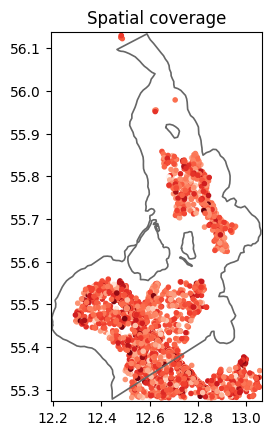

In [14]:
ms.plotting.spatial_overview(altlist, mod=msh.geometry);